### Machine Learning Quiz 3 - K Means
### Submitted By: Stuti Sanghavi

In [33]:
#----------------------------------Importing all the required libraries------------------------------------------#
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns

In [34]:
#-----------------------------------Reading in the file and looking at the head of the data---------------------------#
iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [35]:
#------------------------We see that there are 150 observations and 5 rows in the dataset------------------------------#
iris.shape

(150, 5)

In [36]:
#---------------------------------------Getting descriptive statistics----------------------------------------------------#
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [37]:
#-----------Dropping the Y column since it is unsupervised ML algorithm and we dont need Y label------------------------#
X = iris.drop(columns = ['species'])
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [38]:
#------------------------------------------Assigning actual Y variable-------------------------------------------#
Y = iris['species']
Y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

## Part A and Part B

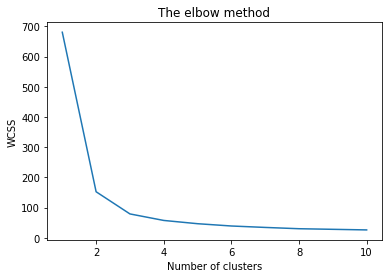

In [39]:
#----------------------------- Finding the optimal number of clusters using Elbow method-------------------------------#

wcss = []
x = iris.iloc[:, [0, 1, 2, 3]].values

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [40]:
#----------------- Standardize X variables to bring all the variables in same scale ---------------------------#
X_std = StandardScaler().fit_transform(X)

## Initial Clustering 

In [41]:
#------------------------------- Running initial clustering with 1 iteration ----------------------------------y#
km_init = KMeans(n_clusters = 3, max_iter = 1, random_state=21, n_init = 1)
km_init.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [42]:
#---------------------------------- Getting cluster center values -------------------------------------------#
km_init.cluster_centers_

array([[-0.19149275, -1.17988288,  0.26769251,  0.16802761],
       [-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [ 0.86726821, -0.03029275,  0.850642  ,  0.86429534]])

In [43]:
# -------------------------------- Getting labels for each of the values of Y -------------------------------#
km_init.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2])

Text(0, 0.5, 'Petal Width')

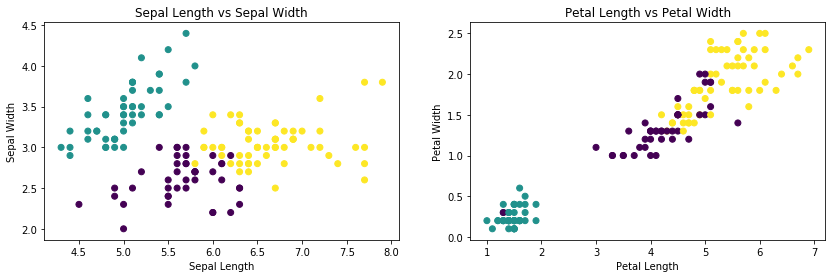

In [12]:
#---------------------Initial Clustering graph for sepal and petal width and length --------------------------#
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
plt.scatter(X['sepal_length'], X['sepal_width'], c = km_init.labels_)
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.subplot(1,2,2)
plt.scatter(X['petal_length'], X['petal_width'], c = km_init.labels_)
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legends(handles=[red_patch, g])

In [13]:
# --------------- Mapping clusters to classes - Chosing the mapping that has maximum overlap---------------- #

# Concatinating predicted and actual Y values
pred_actual_init = pd.concat([Y, pd.Series(km_init.labels_)], axis=1).rename(columns = {0:'cluster_op'})

# Performing groupby for actual and predicted Y values to see where is the maximum overlap of values
cluster_mapping_init = pred_actual_init.groupby(['species','cluster_op']).agg({'species':'count'}).add_suffix('_count').\
reset_index().sort_values(by = 'species_count',ascending = False)

# Gettting the top three values
cluster_mapping_init = cluster_mapping_init[0:3]

# Printing the results
cluster_mapping_init

,species,cluster_op,species_count
1,setosa,1,49
5,virginica,2,42
2,versicolor,0,33


In [14]:
#--------------------------- Rename the cluster output to the class labels ----------------------------------#

#From above considering cluster 1 = setosa; cluster 0 = veriscolor; cluster 2 = virginica
cluster_op_mapped_init = pd.DataFrame(km_init.labels_).rename(columns = {0:'cluster_op'}).\
merge(cluster_mapping_init, how = 'left')['species']

# Checking if they were mapped properly
cluster_op_mapped_init

0          setosa
1          setosa
2          setosa
3          setosa
4          setosa
          ...    
145     virginica
146    versicolor
147     virginica
148     virginica
149     virginica
Name: species, Length: 150, dtype: object

In [15]:
# ------------------------Identifying the mapping - Confusion Matrix-------------------------------------#
confusion_matrix(Y, cluster_op_mapped_init)

array([[49,  1,  0],
       [ 0, 33, 17],
       [ 0,  8, 42]], dtype=int64)

In [16]:
# -------------------------------- Calculating the accuracy score ----------------------------------------# 
acc = accuracy_score(Y, cluster_op_mapped_init)
print('The accuracy score is ' + str(round(acc,4)))

The accuracy score is 0.8267


In [17]:
# -------------------- Getting the initial objective function value ------------------------------#
print('The initial value of objective function is ' + str(round(km_init.inertia_,2)))

The initial value of objective function is 145.85


## Final Clustering

In [18]:
#----------------------------------------- Final Clustering -------------------------------------------------#
km = KMeans(n_clusters = 3, max_iter = 1000, random_state=21, n_init = 50)
km.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=50, n_jobs=None, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [19]:
#------------------------ Getting the labels from the kmeans clustering ------------------------------------#
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Text(0, 0.5, 'Petal Width')

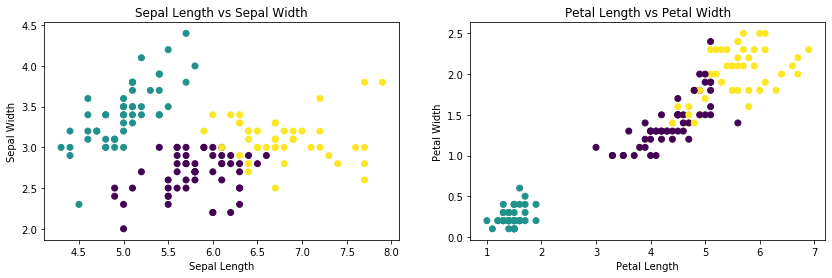

In [20]:
#------------------Final Clustering graph for sepal and petal width and length-------------------------------#
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
plt.scatter(X['sepal_length'], X['sepal_width'], c = km.labels_)
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.subplot(1,2,2)
plt.scatter(X['petal_length'], X['petal_width'], c = km.labels_)
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [21]:
# --------------- Mapping clusters to classes - Chosing the mapping that has maximum overlap---------------- #

# Concatinating predicted and actual Y values
pred_actual = pd.concat([Y, pd.Series(km.labels_)], axis=1).rename(columns = {0:'cluster_op'})

# Performing groupby for actual and predicted Y values to see where is the maximum overlap of values
cluster_mapping = pred_actual.groupby(['species','cluster_op']).agg({'species':'count'}).add_suffix('_count').\
reset_index().sort_values(by = 'species_count',ascending = False)

# Gettting the top three values
cluster_mapping = cluster_mapping[0:3]

# Printing the results
cluster_mapping

,species,cluster_op,species_count
0,setosa,1,50
1,versicolor,0,39
4,virginica,2,36


In [22]:
#--------------------------- Rename the cluster output to the class labels ----------------------------------#

#From above considering cluster 1 = setosa; cluster 0 = veriscolor; cluster 2 = virginica
cluster_op_mapped = pd.DataFrame(km.labels_).rename(columns = {0:'cluster_op'}).\
merge(cluster_mapping, how = 'left')['species']

# Checking if they were mapped properly
cluster_op_mapped

0          setosa
1          setosa
2          setosa
3          setosa
4          setosa
          ...    
145     virginica
146    versicolor
147     virginica
148     virginica
149    versicolor
Name: species, Length: 150, dtype: object

In [23]:
# ------------------------Identifying the mapping - Confusion Matrix-------------------------------------#
confusion_matrix(Y, cluster_op_mapped)

array([[50,  0,  0],
       [ 0, 39, 11],
       [ 0, 14, 36]], dtype=int64)

In [24]:
# -------------------------------- Calculating the accuracy score ----------------------------------------# 
acc = accuracy_score(Y, cluster_op_mapped)
print('The accuracy score is ' + str(round(acc,4)))

The accuracy score is 0.8333


In [25]:
# -------------------- Getting the final objective function value ------------------------------#
print('The final value of objective function is '+ str(round(km.inertia_,2)))

The final value of objective function is 140.97


### Interpreting the results


-   K-means algorithm aims to partition 'n' observations into 'k' clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.It hence identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.


- Our objective function is to minimize the sum of squared errors between the data point and the centroid. Hence the lower the value of objective function, the better it is.


- In the initial clustering, we tell the algorithm that we need 3 clusters, want to run only 1 iteration 1 time. Then we look at the accuracy score from the initial clustering which is around 0.8267 and the value of objective function is 145.85.


- For the second final clustering, we give the same number of clusters, but now tell the algorithm to run 50 times and each run can take upto 1000 iterations. We do this, to get a stable output. Then we again check the accuracy score for the final clustering and see that the accuracy slightly improved from 0.8267 to 0.8333 and the value of objective function decreased from 145.85 to 140.97. This tells us that our model improved. 


- In a confusion matrix, the predicted class labels (0, 1, 2) are written along the top (column names). The true class labels (Iris-setosa, etc.) are written along the left side of the matrix. Each cell in the matrix is a count of how many instances of a true class were classified as each of the predicted classes. 


- A perfect classification will produce a confusion matrix with all zeros except on the diagonal. A confused classification will have large values not on the diagonal. In the intial and final clustering our off-diagonal cells do contain non-zero values, which are the errors made by the model for correctly predicting the true values. Hence, our diagonal cells in the confusion matrix are lesser than 50 each, had it been 50 each then the accuracy score would be 1.


- Our results in the graph and confusion matrix are consistent. We see that setosa species is spaced out from the other two sepecies and hence the algorithm correctly clusters and classifies the Setosa species. However since the other two species of veronica and versicolor are close together, there seems to be some misclassification in those two species group which causes the errors.

## Part C

In [26]:
#----------------------------------- Setting parameters for iteration ------------------------------------#
n_init = [5, 10, 30, 80]
max_iter = [10, 100, 500, 1000]
tol = [0.5, 0.1, 0.01, 0.001]
random_state = [10, 20, 30]
acc = []
inertia = []

In [27]:
# --------- Running a loop to get different accuracy and objective function for different iterations------ #

for n in n_init:
    for m in max_iter:
        for t in tol:
            for r in random_state:

                #Run the K-means algorithm
                km = KMeans(n_clusters = 3, max_iter = m, random_state = r, n_init = n, tol = t)
                km.fit(X_std)

                #Map K-Means output to the Y variable
                # Mapping clusters to classes - Chosing the mapping that has maximum overlap
                pred_actual = pd.concat([Y, pd.Series(km.labels_)], axis=1).rename(columns = {0:'cluster_op'})
                cluster_mapping = pred_actual.groupby(['species','cluster_op']).agg({'species':'count'}).add_suffix('_count').reset_index()\
                    .sort_values(by = 'species_count',ascending = False)
                cluster_mapping = cluster_mapping[0:3]

                cluster_op_mapped = pd.DataFrame(km.labels_).rename(columns = {0:'cluster_op'}).merge(cluster_mapping, how = 'left')['species']

                #Calculate and save accuracy
                acc.append(accuracy_score(Y, cluster_op_mapped))

                #Caluclate and save inerita
                inertia.append(km.inertia_)

Text(0, 0.5, 'Count of iterations')

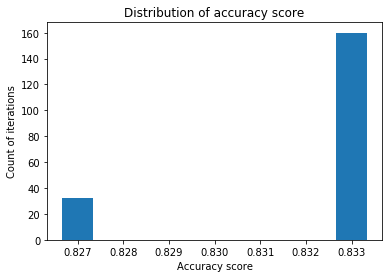

In [28]:
# ------------------ Plotting a distribution plot for accuracy --------------------------------------- #
plt.hist(acc)
plt.title('Distribution of accuracy score')
plt.xlabel('Accuracy score')
plt.ylabel('Count of iterations')

Text(0, 0.5, 'Count of iterations')

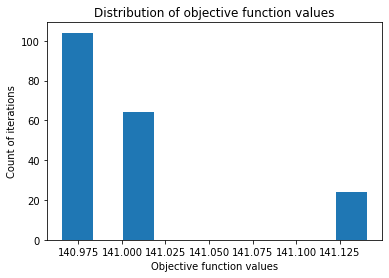

In [29]:
# ------------------ Plotting a distribution plot for objective function values ------------------------------------- #
plt.hist(inertia)
plt.title('Distribution of objective function values')
plt.xlabel('Objective function values')
plt.ylabel('Count of iterations')

In [30]:
# ----------------- Correlation between accuracy scores and objective function values------------------------ #

# Converting list to series
acc_score = pd.Series(acc)
obj_fn = pd.Series(inertia)

# Getting the correlation between the above two values
print('The correlation between accuracy score and objective function values is ' + str(round(acc_score.corr(obj_fn),2)))

The correlation between accuracy score and objective function values is -0.77


Text(0, 0.5, 'Clustering Objective function value')

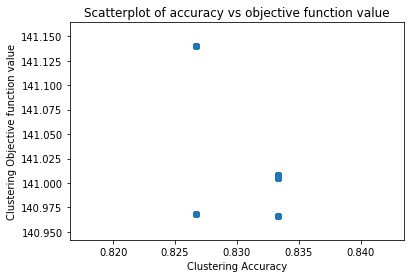

In [31]:
# # ------------------ Plotting a distribution plot for objective function values ------------------------------------- #
plt.scatter(acc_score, obj_fn)
plt.title('Scatterplot of accuracy vs objective function value')
plt.xlabel('Clustering Accuracy')
plt.ylabel('Clustering Objective function value') 

### Interpreting the graphs above

- For the distribution plot of acccuracy score, when the Kmeans algorithm runs around 192 times, using different parameter combinations, we see that most of the times (around 160 times) the accuracy score that we recieved is around 0.833 indicating that we are recieving higher accuracy from our algorithm.


- For the distribution plot of objective value functions, when the Kmeans algorithm runs around 192 times, using different parameter combinations, we see that most of the times (more than 160 times) the objective function value is between 140.975 to 141.025. Our objective function is to minimize the sum of squared errors and hence the lower the value, the better it is.


- For the scatterplot between accuracy and objective function, we see that there is a negative correlation between the two. This means that when the value of objective function decreases, the value of accuracy increases. This is inline with what we are trying to achieve.

In [32]:
#--------------------------------- Getting the best outcome ------------------------------------------ # 
max_acc = max(acc)
min_inertia = min(inertia)

req = ((acc == max_acc) & (inertia == min_inertia))
np.where(req == True)

#We have max acc and min inertia values at pos 6, 9, etc.
#Values that correspond to pos 6 are - 
#n_init = 5 max_iter = 10  tol = 0.1  random state = 30

(array([  6,   9,  10,  11,  18,  21,  22,  23,  30,  33,  34,  35,  42,
         45,  46,  47,  54,  55,  57,  58,  59,  66,  67,  69,  70,  71,
         78,  79,  81,  82,  83,  90,  91,  93,  94,  95, 102, 103, 105,
        106, 107, 114, 115, 117, 118, 119, 126, 127, 129, 130, 131, 138,
        139, 141, 142, 143, 144, 145, 147, 148, 150, 151, 152, 153, 154,
        155, 156, 157, 159, 160, 162, 163, 164, 165, 166, 167, 168, 169,
        171, 172, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 186,
        187, 188, 189, 190, 191], dtype=int64),)

- We can get the best outcome where the accuracy is highest and the objective function value is the lowest. For that we run the above function where we see that we have max acc and min inertia values at pos 6, 9, etc.


- For example for the best outcome at position 6, the different parameter values are : n_init = 5, max_iter = 10, tol = 0.1, random state = 30